In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


1. **라이브러리 및 데이터 불러오기
 - **라이브러리 버전 확인 반드시 해준다!!**
2. 탐색적 자료 분석 (EDA)
 - **데이터 시각화**
 - **산점도, 막대그래프 등**
 - **그래프 해석해서 설명 달기**
 - 약간의 데이터 전처리
3. 데이터 전처리
 - Feature Engineering
 - ML 모형을 돌리기 위해 표준화 등/ 원핫-인코딩
 - 파생변수(도출변수) 만들기
  + 왜 이변수를 만들었는지에 대한 설명 필요
4. 머신러닝 모형 개발
 - 모형(로지스틱,,등)에 대한 설명 필요
 - 모형은 1, 2개 정도만 사용하자
 - 교차 검증, 하이퍼파라미터 튜닝
5. 모형 평가
 - 훈련 데이터를 쪼개서 훈련 데이터와 검증 데이터 분리
 - 정확도 비교
 - 혼동행렬(confusion Matrix) 설명을 잘 찾아서 넣어주자
6. 제출
 - 제출 양식 샘플은 쌤이 만들어 준다.
★. 참고
 - 다른 사람의 code를 참고 했다면 노트북 표절 방지를 위해 참조한 코드는 반드시 링크 걸어둘 것
  + 저자 이름, 글 제목, 링크 주소.
★. 마감일
 - 4월 12일 17시 40분
 - 제출 형태
  + Leaderboard 랭킹 사진 캡쳐
  + 고용노동부 보고하기.

★★ 코드가 오류가 계속 날 때는 쌤이 도움이 되는 링크만 준다(실력은 늘지도,,)

#### 데이터 설명
- 우주선 타이타닉이 시공간 이상과 충돌 하는 동안에 승객이 다른 차원으로 이동했는가에 대한 여부 예측하는 것.
 + 이러한 예측을 돕기 위해 손상된 함선의 컴퓨터 시스템에서 복구된 개인 기록이 제공됩니다.

- sample_submission.csv : 올바른 형식의 송신 파일.
- train : 승객이 다른 차원으로 운송되었는지 여부. 예측하려는 대상 열입니다.(훈련데이터로 사용됨)
- test : 테스트 데이터로 사용되는 나머지 승객의 1/3(~4300)에 대한 개인 기록. 작업은 이 세트의 승객에 대한 운송 값을 예측하는 것

- PassengerId - 테스트 세트에 포함된 각 승객의 ID
- Transported - 타겟. 각 승객에 대해 참 또는 거짓을 예측
- HomePlanet - 승객이 출발한 행성으로, 일반적으로 영구 거주지 행성
- CryoSleep - 승객이 항해가 진행되는 동안 일시 정지 애니메이션으로 전환되도록 선택했는지 여부를 나타냅니다. 저온 수면 중인 승객들은 객실에 갇히게 된다.
- Cabin : 승객이 머물고 있는 객실 번호입니다. 갑판/번호/측면 형식을 취합니다. 여기서 측면은 좌현에 P 또는 우현에 S가 될 수 있습니다.
- Destination : 승객이 주차를 해제할 행성입니다.
- VIP - 승객이 여행 중 특별 VIP 서비스에 비용을 지불했는지 여부
- 룸 서비스, 푸드 코트, 쇼핑 몰, 스파, VRDeck - 승객이 우주선 타이타닉의 많은 고급 편의 시설 각각에서 청구한 금액.

In [2]:
import pandas as pd
submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")
df = pd.read_csv("../input/spaceship-titanic/train.csv")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

In [5]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


- 드랍을 시키는 이유는 모형에 아무런 영향을 주지 않기 때문.
- 드랍은 지정된 행이나 열을 삭제하기 때문에 행축을 지정(axis= 0 또는 1 )

In [10]:
#df = df.drop(['Cabin'], axis=1)
#df

In [11]:
#test = test.drop(['Cabin'], axis=1)
#test

In [12]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


df(train)의 누락값을 na 해주고 describe 해주기

In [13]:
df.dropna().describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [14]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [15]:
test.dropna().describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,28.582444,220.147516,440.914051,175.314233,296.718683,300.355684
std,14.112137,619.036964,1491.232741,569.268632,1086.436043,1172.719307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,27.000000,49.000000,34.000000
max,79.000000,11567.000000,20809.000000,8292.000000,15733.000000,19086.000000


### 결측치 확인

In [16]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [18]:
df.groupby('VIP').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
VIP,,,,,,,,,,,,,
False,8291,8098,8084,8104,8115,8119,8118,8118,8092,8112,8108,8095,8291
True,199,194,196,193,197,198,195,193,194,197,195,196,199


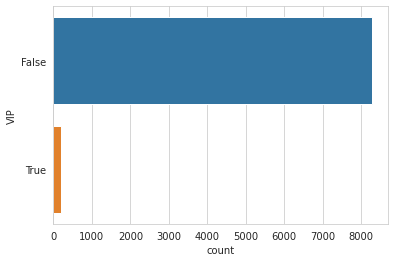

In [19]:
sns.countplot(y='VIP', data=df);

- 저온 수면을 안한 사람이 많음

In [20]:
df.groupby('CryoSleep').count()

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
CryoSleep,,,,,,,,,,,,,
False,5439,5315,5331,5309,5343,5318,5328,5329,5335,5326,5320,5311,5439
True,3037,2962,2953,2989,2955,2962,2969,2967,2941,2972,2975,2975,3037


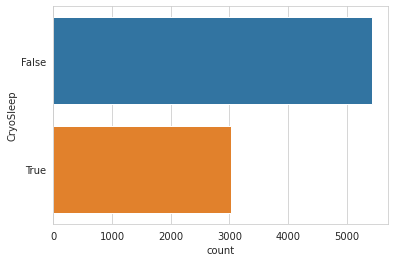

In [21]:
sns.countplot(y='CryoSleep', data=df);

Transported는 수가 비슷함.

In [22]:
df.groupby('Transported').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,4315,4217,4204,4216,4225,4226,4216,4217,4231,4221,4223,4225,4216
True,4378,4275,4272,4278,4286,4288,4274,4295,4279,4264,4287,4280,4277


In [23]:
df['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

### 시각화

- 탑승객은 대부분이 20대 ~ 40대 사이가 많이 탑승하고 있고, 50 ~70대는 많지 않게 탑승하고 있어 VIP에 가입한 사람이 20대 부터 존재한다.


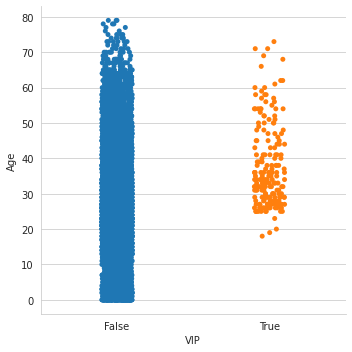

In [24]:
sns.catplot(x='VIP', y='Age', data=df)

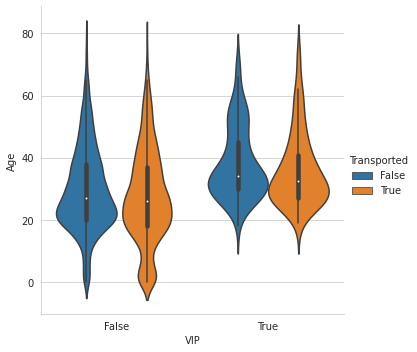

In [25]:
sns.catplot(x='VIP', y='Age', hue='Transported', data=df,
           kind='violin')

- 푸드코트를 많이 이용한 사람이 생존율이 좀 더 높았고, 룸서비스를 많이 이용할 수록 생존율이 떨어지는 것을 확인 할 수 있다.

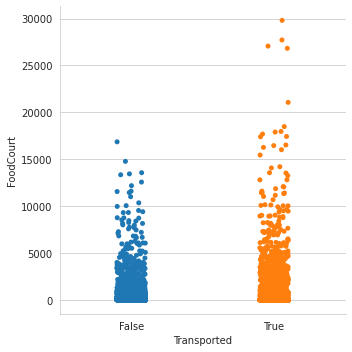

In [26]:
sns.catplot(x='Transported', y='FoodCourt', data=df)

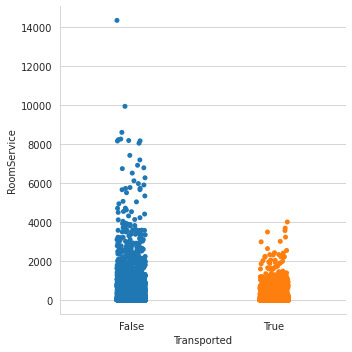

In [27]:
sns.catplot(x='Transported', y='RoomService', data=df)

생존자, 죽은자 

In [28]:
df_nottransported = df[(df["Transported"] == 0)]
df_nottransported.shape

(4315, 14)

In [29]:
df_transported = df[(df["Transported"] == 1)]
df_transported.shape

(4378, 14)

### 필요한 카테고리로 묶어주기

In [30]:
# train
df_cat = df.select_dtypes(include='object')
df_cat.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [31]:
# test
test_cat = test.select_dtypes(include = 'object')
test_cat.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez


In [32]:
df_cat = df.select_dtypes(include='float64')
df_cat.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


CryoSleep(저온수면) False 또는 True, 목적지, VIP 관계성 

### 표준화 작업
- 표쥰화 작업
- 활동적인 사람(밖에 나와 있는 사람 이거나 쇼핑몰이나 즐길거리가 많은 곳에서 차원이동하는 곳이 가까웠다?)의 생존율이 높았다는 가설을 세웠는데,, 이걸 토대로 한 번 예측을 해보자.

In [33]:
data = df[['Age', 'RoomService', 'FoodCourt',
           'ShoppingMall', 'Spa', 'VRDeck']].to_numpy()
target = df[['Transported']].to_numpy()

In [34]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state=42)

print(train_input.shape, test_input.shape)

(6954, 6) (1739, 6)


In [35]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(train_scaled, train_target)
#print(lr.score(train_scaled, train_target))
#print(lr.score(test_scaled, test_target))
#print(lr.coef_, lr.intercept_)

In [36]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#ss.fit(train_input)
#train_scaled = ss.transform(train_input)
#test_scaled = ss.transform(test_input)

In [37]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(train_scaled, train_target)
#print(lr.score(train_scaled, train_target))
#print(lr.score(test_scaled, test_target))